<a href="https://colab.research.google.com/github/MauricioTellezNava/viropolitica_poblacionCDMX/blob/main/An%C3%A1lisisX2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis de los grupos poblacionales clusterizados

[Preprocesamiento y aplicación de Kmeans](https://colab.research.google.com/drive/1nPZo-sdBCcaAT7TZvCp83zwsqtI3MZ-H?usp=sharing)

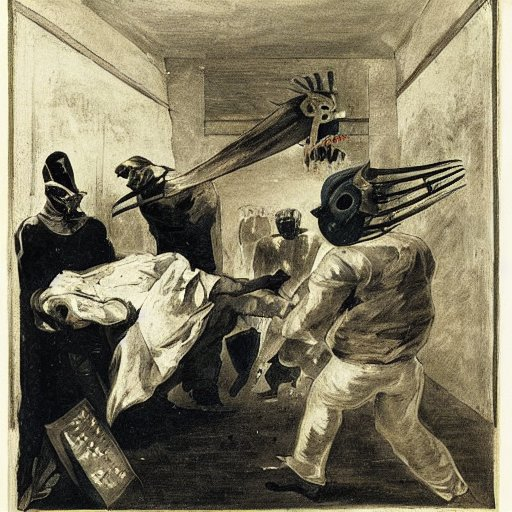

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
X = pd.read_csv("/content/drive/MyDrive/Análisis del COVID-19 para la Ciudad de México/población parte 2/X2.csv")
X = X.drop(columns=["Unnamed: 0"])
print(X.shape)
X.head()

(1668642, 39)


,asma_si,cardio_si,diabetes_si,EDAD,embarazo_si,epoc_si,leng_ind_si,hipert_si,indigena_si,inmusupr_si,...,otr_com_si,otr_caso_si,renalCr_si,sex_M,sex_H,tabaq_si,paciente_hosp,uci_si,defunciones,cluster
0,0,0,1,67,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,2
1,0,0,0,62,0,0,0,1,0,0,...,0,1,0,1,0,0,0,0,0,2
2,0,0,0,45,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
3,0,0,0,38,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,3
4,0,0,0,26,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1


## Tabla pivote 

In [ ]:
X_pivot = pd.pivot_table(X, index='cluster')
X_pivot["cluster"] = X_pivot.index
X_pivot.sort_values(by="EDAD")

,EDAD,alc_alv,alc_azcap,alc_beniJ,alc_coyo,alc_cuaj,alc_cuauh,alc_gam,alc_iztac,alc_iztap,...,otr_caso_si,otr_com_si,paciente_hosp,renalCr_si,sex_H,sex_M,tabaq_si,uci_si,venusC,cluster
cluster,,,,,,,,,,,,,,,,,,,,,
1,19.544662,0.144312,0.052988,0.030330,0.056013,0.019074,0.046331,0.118191,0.037840,0.146352,...,0.461197,0.004682,0.008636,0.001665,0.476050,0.523950,0.058554,0.000415,0.042307,1
3,32.776576,0.125986,0.054602,0.043118,0.060125,0.017284,0.057994,0.120840,0.041025,0.148791,...,0.439349,0.007314,0.020786,0.003158,0.459122,0.540878,0.097401,0.001218,0.042992,3
0,46.827103,0.125125,0.055685,0.039615,0.061040,0.016420,0.054431,0.125167,0.043242,0.149781,...,0.433085,0.010303,0.048896,0.005912,0.435375,0.564625,0.079743,0.003192,0.046113,0
2,62.670197,0.122199,0.058714,0.045982,0.063968,0.014727,0.060307,0.130714,0.045005,0.144313,...,0.401429,0.016529,0.138139,0.015052,0.454347,0.545653,0.064353,0.009214,0.050303,2


## Analisis de los clústeres

* Alpha = cluster 1. Es el grupo más capaz de ejercer la viropolítica. Dados sus bajos valores para cada condición de riesgo, es el grupo menos vulnerable. 
* Beta = cluster 3. Es el segundo grupo más capaz de ejercer la viropolítica. Mantiene valores bajos para cada condición de riesgo.
* Gamma = cluster 0. Es el segundo grupo más vulnerable a la viropolítica.
* Delta = cluster 2. Es el grupo más vulnerable frente a la viropolítica. Incluye a la población que requirió mayores cuidados intensivos, ser intubada. Tuvo valores mayores de sistema inmunosuprimido, requirió mñas hospitalizaciones. 

### Crear la columna nombre_cluster con función condicional

In [ ]:
condiciones = [
    (X["cluster"]== 1),
    (X["cluster"]== 3),
    (X["cluster"]== 0),
    (X["cluster"]== 2)
               ]
nombre = ["alpha", "beta", "gamma", "delta"]
X["nombre_cluster"] = np.select(condiciones, nombre)
X.head()

,asma_si,cardio_si,diabetes_si,EDAD,embarazo_si,epoc_si,leng_ind_si,hipert_si,indigena_si,inmusupr_si,...,otr_caso_si,renalCr_si,sex_M,sex_H,tabaq_si,paciente_hosp,uci_si,defunciones,cluster,nombre_cluster
0,0,0,1,67,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,2,delta
1,0,0,0,62,0,0,0,1,0,0,...,1,0,1,0,0,0,0,0,2,delta
2,0,0,0,45,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,gamma
3,0,0,0,38,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,3,beta
4,0,0,0,26,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,1,alpha


### Analisis de los clústeres

#### conjunto de clústeres

In [ ]:
X["nombre_cluster"].value_counts()

beta     482880
gamma    474311
alpha    395089
delta    316362
Name: nombre_cluster, dtype: int64

<Axes: >

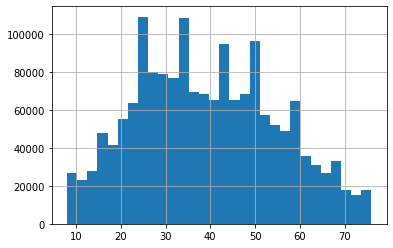

In [ ]:
X["EDAD"].hist(bins=30)

#### alpha

In [ ]:
# alpha
X[X["nombre_cluster"]=="alpha"]["EDAD"].describe()

count    395089.000000
mean         19.544662
std           5.067375
min           8.000000
25%          16.000000
50%          21.000000
75%          24.000000
max          26.000000
Name: EDAD, dtype: float64

<Axes: >

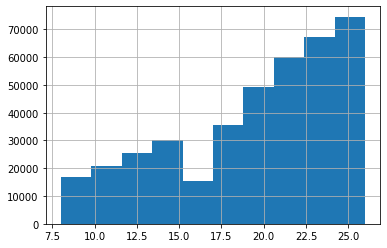

In [ ]:
X[X["nombre_cluster"]=="alpha"]["EDAD"].hist()

#### beta

In [ ]:
X[X["nombre_cluster"]=="beta"]["EDAD"].describe()

count    482880.000000
mean         32.776576
std           3.734821
min          27.000000
25%          30.000000
50%          33.000000
75%          36.000000
max          39.000000
Name: EDAD, dtype: float64

<Axes: >

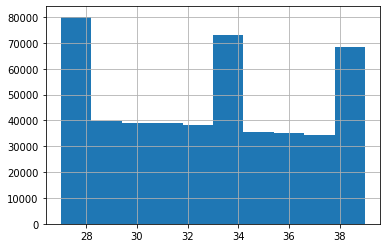

In [ ]:
X[X["nombre_cluster"]=="beta"]["EDAD"].hist()

#### gamma

In [ ]:
X[X["nombre_cluster"]=="gamma"]["EDAD"].describe()

count    474311.000000
mean         46.827103
std           4.235008
min          40.000000
25%          43.000000
50%          47.000000
75%          50.000000
max          54.000000
Name: EDAD, dtype: float64

<Axes: >

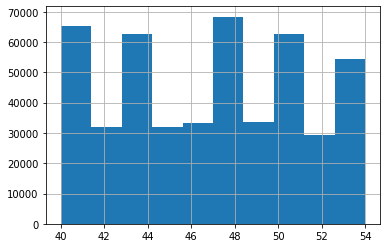

In [ ]:
X[X["nombre_cluster"]=="gamma"]["EDAD"].hist()

#### delta

In [ ]:
X[X["nombre_cluster"]=="delta"]["EDAD"].describe()

count    316362.000000
mean         62.670197
std           5.841905
min          55.000000
25%          58.000000
50%          62.000000
75%          67.000000
max          76.000000
Name: EDAD, dtype: float64

<Axes: >

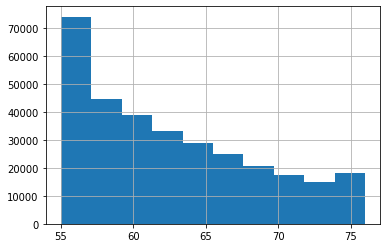

In [ ]:
X[X["nombre_cluster"]=="delta"]["EDAD"].hist()

### Manipulación de tabla pivote

In [ ]:
X_pivot = pd.pivot_table(X, index='nombre_cluster')
X_pivot["nombre_cluster"] = X_pivot.index
X_pivot = X_pivot.sort_values(by="EDAD")
X_pivot

,EDAD,alc_alv,alc_azcap,alc_beniJ,alc_coyo,alc_cuaj,alc_cuauh,alc_gam,alc_iztac,alc_iztap,...,otr_caso_si,otr_com_si,paciente_hosp,renalCr_si,sex_H,sex_M,tabaq_si,uci_si,venusC,nombre_cluster
nombre_cluster,,,,,,,,,,,,,,,,,,,,,
alpha,19.544662,0.144312,0.052988,0.030330,0.056013,0.019074,0.046331,0.118191,0.037840,0.146352,...,0.461197,0.004682,0.008636,0.001665,0.476050,0.523950,0.058554,0.000415,0.042307,alpha
beta,32.776576,0.125986,0.054602,0.043118,0.060125,0.017284,0.057994,0.120840,0.041025,0.148791,...,0.439349,0.007314,0.020786,0.003158,0.459122,0.540878,0.097401,0.001218,0.042992,beta
gamma,46.827103,0.125125,0.055685,0.039615,0.061040,0.016420,0.054431,0.125167,0.043242,0.149781,...,0.433085,0.010303,0.048896,0.005912,0.435375,0.564625,0.079743,0.003192,0.046113,gamma
delta,62.670197,0.122199,0.058714,0.045982,0.063968,0.014727,0.060307,0.130714,0.045005,0.144313,...,0.401429,0.016529,0.138139,0.015052,0.454347,0.545653,0.064353,0.009214,0.050303,delta


In [ ]:
X_pivot.columns

Index(['EDAD', 'alc_alv', 'alc_azcap', 'alc_beniJ', 'alc_coyo', 'alc_cuaj',
       'alc_cuauh', 'alc_gam', 'alc_iztac', 'alc_iztap', 'alc_magdC',
       'alc_migH', 'alc_milpa', 'alc_tlah', 'alc_tlalp', 'alc_xoch', 'asma_si',
       'cardio_si', 'cluster', 'defunciones', 'diabetes_si', 'embarazo_si',
       'epoc_si', 'hipert_si', 'indigena_si', 'inmusupr_si', 'intub_si',
       'leng_ind_si', 'neumonia_si', 'obesidad_si', 'otr_caso_si',
       'otr_com_si', 'paciente_hosp', 'renalCr_si', 'sex_H', 'sex_M',
       'tabaq_si', 'uci_si', 'venusC', 'nombre_cluster'],
      dtype='object')

#### Factores relacionados con la historia natural de la enfermedad

In [ ]:
matriz = X_pivot[["EDAD", "intub_si", "paciente_hosp", "uci_si", "defunciones"]]
matriz[["intub_si", "paciente_hosp", "uci_si", "defunciones"]] = matriz[["intub_si", "paciente_hosp", "uci_si", "defunciones"]].mul(100)
print("Factores relacionados con la historia natural de la enfermedad \n")
matriz.round(2)

Factores relacionados con la historia natural de la enfermedad 



<ipython-input-88-e9d5c713140a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matriz[["intub_si", "paciente_hosp", "uci_si", "defunciones"]] = matriz[["intub_si", "paciente_hosp", "uci_si", "defunciones"]].mul(100)


,EDAD,intub_si,paciente_hosp,uci_si,defunciones
nombre_cluster,,,,,
alpha,19.54,0.05,0.86,0.04,0.08
beta,32.78,0.21,2.08,0.12,0.43
gamma,46.83,0.74,4.89,0.32,1.76
delta,62.67,2.45,13.81,0.92,7.55


#### Factores relacionados con condiciones de salud

In [ ]:
condiciones_salud = X_pivot[["EDAD",  "diabetes_si", "obesidad_si", "hipert_si", "inmusupr_si", "renalCr_si", "cardio_si", "asma_si", "neumonia_si", "epoc_si", "tabaq_si"]]
condiciones_salud[["diabetes_si", "obesidad_si", "hipert_si", "inmusupr_si", "renalCr_si", "cardio_si", "asma_si", "neumonia_si", "epoc_si", "tabaq_si"]] = condiciones_salud[["diabetes_si", "obesidad_si", "hipert_si", "inmusupr_si", "renalCr_si", "cardio_si", "asma_si", "neumonia_si", "epoc_si", "tabaq_si"]].mul(100)
print("Factores relacionados con condiciones de salud (%)")
condiciones_salud.round(2)                                                                                                                                                                               

Factores relacionados con condiciones de salud (%)


<ipython-input-90-95d37e2ec0c4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  condiciones_salud[["diabetes_si", "obesidad_si", "hipert_si", "inmusupr_si", "renalCr_si", "cardio_si", "asma_si", "neumonia_si", "epoc_si", "tabaq_si"]] = condiciones_salud[["diabetes_si", "obesidad_si", "hipert_si", "inmusupr_si", "renalCr_si", "cardio_si", "asma_si", "neumonia_si", "epoc_si", "tabaq_si"]].mul(100)


,EDAD,diabetes_si,obesidad_si,hipert_si,inmusupr_si,renalCr_si,cardio_si,asma_si,neumonia_si,epoc_si,tabaq_si
nombre_cluster,,,,,,,,,,,
alpha,19.54,0.46,3.70,0.56,0.20,0.17,0.26,2.22,1.13,0.07,5.86
beta,32.78,1.86,7.82,2.52,0.30,0.32,0.35,2.00,2.24,0.11,9.74
gamma,46.83,8.74,10.37,10.66,0.56,0.59,0.76,1.80,4.36,0.35,7.97
delta,62.67,21.08,9.98,27.47,1.03,1.51,2.23,1.41,10.77,1.50,6.44


#### Otros factores sociales y de salud

In [ ]:
fsoc_salud = X_pivot[["EDAD", "indigena_si", "leng_ind_si", "embarazo_si", "otr_com_si"]]
fsoc_salud[["indigena_si", "leng_ind_si", "embarazo_si", "otr_com_si"]] = fsoc_salud[["indigena_si", "leng_ind_si", "embarazo_si", "otr_com_si"]].mul(100)
print("Otros factores sociales y de salud \n")
fsoc_salud.round(2)

Otros factores sociales y de salud 



<ipython-input-91-0f47836b1d2f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fsoc_salud[["indigena_si", "leng_ind_si", "embarazo_si", "otr_com_si"]] = fsoc_salud[["indigena_si", "leng_ind_si", "embarazo_si", "otr_com_si"]].mul(100)


,EDAD,indigena_si,leng_ind_si,embarazo_si,otr_com_si
nombre_cluster,,,,,
alpha,19.54,0.23,0.17,1.11,0.47
beta,32.78,0.28,0.22,1.01,0.73
gamma,46.83,0.31,0.23,0.10,1.03
delta,62.67,0.37,0.27,0.01,1.65


#### Alcaldias

In [ ]:
X_pivot.columns

Index(['EDAD', 'alc_alv', 'alc_azcap', 'alc_beniJ', 'alc_coyo', 'alc_cuaj',
       'alc_cuauh', 'alc_gam', 'alc_iztac', 'alc_iztap', 'alc_magdC',
       'alc_migH', 'alc_milpa', 'alc_tlah', 'alc_tlalp', 'alc_xoch', 'asma_si',
       'cardio_si', 'cluster', 'defunciones', 'diabetes_si', 'embarazo_si',
       'epoc_si', 'hipert_si', 'indigena_si', 'inmusupr_si', 'intub_si',
       'leng_ind_si', 'neumonia_si', 'obesidad_si', 'otr_caso_si',
       'otr_com_si', 'paciente_hosp', 'renalCr_si', 'sex_H', 'sex_M',
       'tabaq_si', 'uci_si', 'venusC', 'nombre_cluster'],
      dtype='object')

In [ ]:
X_pivot[['alc_alv', 'alc_azcap', 'alc_beniJ', 'alc_coyo', 'alc_cuaj',
       'alc_cuauh', 'alc_gam', 'alc_iztac', 'alc_iztap', 'alc_magdC',
       'alc_migH', 'alc_milpa', 'alc_tlah', 'alc_tlalp', 'alc_xoch', 'venusC']].shape

(4, 16)

In [ ]:
dfalc = X_pivot[['alc_alv', 'alc_azcap', 'alc_beniJ', 'alc_coyo', 'alc_cuaj',
       'alc_cuauh', 'alc_gam', 'alc_iztac', 'alc_iztap', 'alc_magdC',
       'alc_migH', 'alc_milpa', 'alc_tlah', 'alc_tlalp', 'alc_xoch', 'venusC']].mul(100)
dfalc

,alc_alv,alc_azcap,alc_beniJ,alc_coyo,alc_cuaj,alc_cuauh,alc_gam,alc_iztac,alc_iztap,alc_magdC,alc_migH,alc_milpa,alc_tlah,alc_tlalp,alc_xoch,venusC
nombre_cluster,,,,,,,,,,,,,,,,
alpha,14.431179,5.298806,3.032988,5.601270,1.907418,4.633133,11.819109,3.783958,14.635183,3.054502,3.077028,2.558664,5.549129,10.704677,5.682264,4.230692
beta,12.598575,5.460156,4.311837,6.012467,1.728380,5.799370,12.083955,4.102469,14.879059,2.744574,3.547465,2.172175,5.003728,9.826665,5.429920,4.299205
gamma,12.512465,5.568498,3.961536,6.104012,1.641961,5.443053,12.516682,4.324167,14.978147,2.915598,3.395452,2.126664,4.906485,9.575995,5.417964,4.611320
delta,12.219862,5.871438,4.598213,6.396786,1.472680,6.030750,13.071418,4.500541,14.431253,2.671307,3.623381,1.838716,4.392753,8.958724,4.891864,5.030313


In [ ]:
# dfalc.to_csv("/content/drive/MyDrive/Análisis del COVID-19 para la Ciudad de México/población parte 2/alcaldias.csv")

### Diatribución de los grupos poblacionales por vulnerabilidad

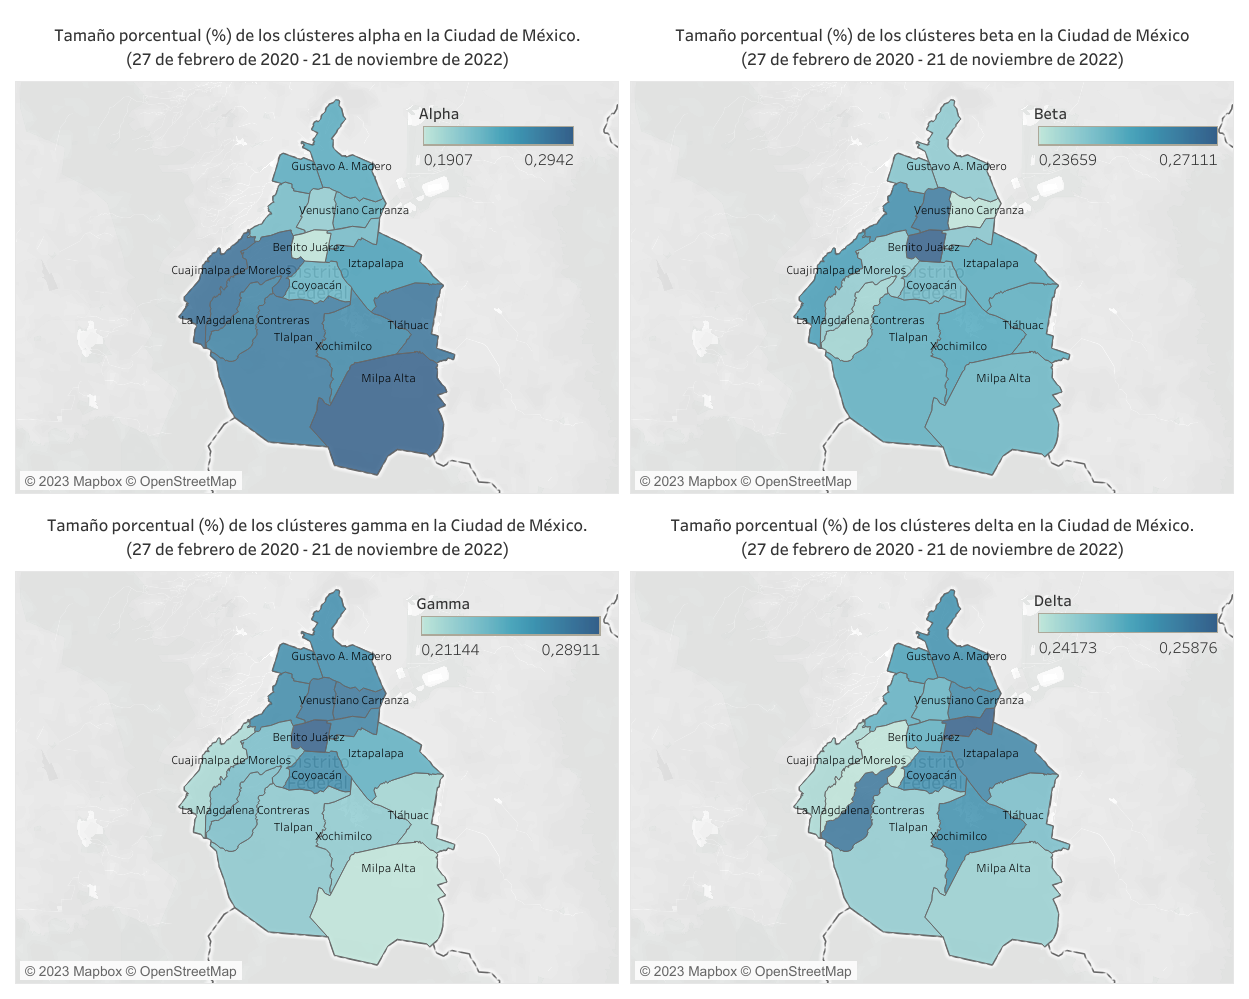